In [171]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import random as rand
%matplotlib inline

In [172]:
pet_data = pd.read_csv('Data/seattle-pet-licenses/seattle_pet_licenses.csv')

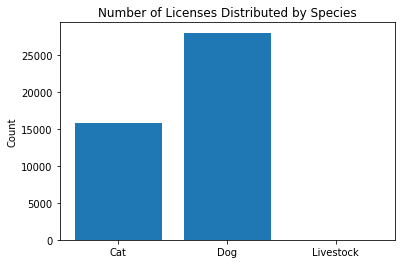

In [173]:
# First, I'm going to count the number of entries associated for each species. 
# In this dataset, that includes dog, cat, and livestock.

pet_data_count = pet_data.groupby(['species']).agg(['count'])

plt.bar(pet_data_count.index.values, pet_data_count[('license_number', 'count')])
plt.title('Number of Licenses Distributed by Species')
plt.ylabel('Count')
plt.show()

In [174]:
# It looks like there were many more (almost twice as many) dog licenses issued by Seattle in this time period.
# It could be there are more dogs than cats in Seattle, but this assumes that the proportion of dogs that were ultimaely licensed is the same as it was for cats.
# It seems quite plausible that cat owners would be less inclined to have their pets licenses than dog owners, as a non-neglible percentage of cats have no meaningful interaction with the world outside their home (i.e. indoor cats). 
# They would thus only be discovered by relevant authorities in extreme circumstances.
# That being said, all this plot shows is that many more dog licenses were given out than cat licenses.

# In any case, all that being said, let's focus more specifically on dogs, looking first at any primary breed trends.

just_dogs = pet_data[pet_data['species'] == 'Dog']
len(just_dogs.primary_breed.unique())

267

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


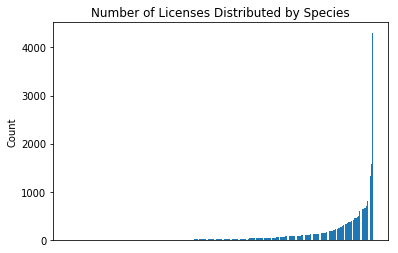

In [225]:
# That's a lot of breeds! Let's plot the data to at least see what kind of structure might exist in this data.
dog_species_count = just_dogs.groupby(['primary_breed']).agg(['count'])

dsc_sorted = dog_species_count.sort_values(by=[('license_number', 'count')])

plt.bar(dsc_sorted.index.values, dsc_sorted[('license_number', 'count')])
plt.title('Number of Licenses Distributed by Species')
plt.ylabel('Count')

# There will be a ton of x-axis labels which means that reading them will be impossible. Let's just hide the text.
plt.axes().get_xaxis().set_visible(False)

plt.show()

In [226]:
# This cell takes way too long
# Redoing it below

# This creates an error that I don't understand.
# However, it does make it apparent that a small number of primary breeds makes up the vast majority of dogs.
# Let's visualize what proportion of the total dogs the top 10 primary breeds make up.

# To do this, we first need to demarcate the top 10 most common dog breeds from the rest.
# just_dogs['new_col'] = pd.Series(0, index=just_dogs.index)

#for dog_dex in just_dogs.index.values:
#    if just_dogs.loc[dog_dex, 'primary_breed'] in dsc_sorted.index[-10:]:
#        just_dogs.loc[dog_dex, 'new_col'] = 'Top 10 Breeds'
#    else:
#        just_dogs.loc[dog_dex, 'new_col'] = 'The Rest'

#dogs_top10determ = just_dogs.groupby(['new_col']).agg(['count'])                  

        



In [227]:
# Redoing the above cell but, hopefully, in a way that's faster
# This doesn't work... I'm not sure how best to do this

# To do this, we first need to demarcate the top 10 most common dog breeds from the rest.
# just_dogs.loc[:,'new_col'] = pd.Series("All the Rest", index=just_dogs.index)

#len(just_dogs.loc[:,'primary_breed']=='Retriever, Golden')
# just_dogs.loc[:,'primary_breed'] in dsc_sorted.index[-10:].values


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


The top 10 most common dog breeds make up 0.41% of the dog population issued licenses.


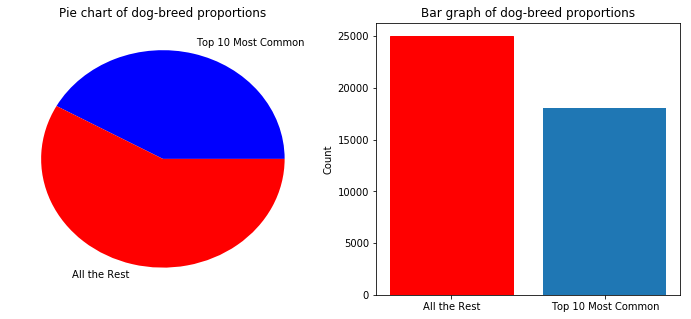

In [228]:
# I failed to do it in either case above... maybe I can cheat?
just_top_dogs = just_dogs.loc[just_dogs['primary_breed'].isin(dsc_sorted.index[-10:].values)]
all_rest_dogs = just_dogs.loc[np.logical_not(just_dogs['primary_breed'].isin(dsc_sorted.index[-10:].values))]

just_top_dogs['new_col']= pd.Series('Top 10 Most Common', index=just_top_dogs.index)
all_rest_dogs['new_col']= pd.Series('All the Rest', index=all_rest_dogs.index)

# For the bar graph
recomb = pd.concat([just_top_dogs, all_rest_dogs])
percentage_info_added = recomb.groupby(['new_col']).agg(['count'])

# For the pie charts
pie_numb_top = len(just_top_dogs)
pie_numb_rest = len(all_rest_dogs)
pie_numbs = np.array([pie_numb_top, pie_numb_rest])
pie_names = np.array(['Top 10 Most Common', 'All the Rest'])

print('The top 10 most common dog breeds make up {}% of the dog population issued licenses.'.format(str(pie_numb_top/(pie_numb_rest+pie_numb_top))[:4]))
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.pie(pie_numbs, labels=pie_names, colors=['b', 'r'])
plt.title('Pie chart of dog-breed proportions')

plt.subplot(1, 2, 2)
bars = plt.bar(percentage_info_added.index.values, percentage_info_added[('license_issue_date', 'count')])
bars[0].set_color('r')
plt.title('Bar graph of dog-breed proportions')
plt.ylabel('Count')

plt.show()

In [224]:
# The above charts make clear that, despite there being 267 different types of breeds, almost half of them are members of the top 10 breeds.